
#            Calcul numérique du MGI d'un RRR par PNL #



On se propose de calculer de manière numérique un modèle géométrique inverse (MGI) d'un robot RRR en utilisant les outils de programmation non-linéaire. 

La configuration du robot est défini par le vecteur $q = (q_1, q_2, q_3)^t$.

La situation de l'outil est défini par le vecteur $X = (x, y, \theta)^t$ .

|![alternative text](robot-rrr3.png)|
|:--:| 
| *  Robot RRR  * |

## Objectif
L'objectif est d'implémenter plusieurs méthodes de recherche de solution pour le calcul du MGI (recherche d'un optimum local), de les comparer et d'en tirer des conclusions. 

Les conditions de sortie des algorithmes seront définies par un nombre
maximum d'itérations et par une valeur seuil pour l'erreur de la fonction objectif.

Vous devez définir des fonctions de calcul du mgi: $[q_{sol}]= mgi(X_d, q_0, NbIter, \epsilon$) avec $X_d$ situation désirée, $q_0$ configuration initiale du robot, $NbIter$ nombre maximum d'itérations, $\epsilon$ précision du calcul de la solution.


## Méthodes

Pour calculer le MGI avec les outils de programmation non linéaire vous devez implémenter une fonction qui à chaque itération va calculer :

***$q_{k+1} = q_k + pas * direction$***


Le calcul du $pas$ et de la $direction$ dépend de la méthode mise en œuvre.

## Evaluation
Pour ce TP vous devez déposer un ou deux fichiers au format .ipynb, dont le nom est
tpMGI-x-prenom1_nom1-prenom2_nom2.ipynb, le tout en minuscule avec x= 1 ou 2. 
Vous remplirez vos noms, prénoms de manière correcte. (1 point de malus si le nom du fichier ne suit pas cette forme).

Vous devez déposer deux fichier sur Moodle
- un en fin de séance avant de quitter la salle avec x=1 (permet de mieux prendre en compte le travail en séance)
- un second avant la date indiquée en séance, avec x=2, si vous n'avez pas eu le temps de terminer le TP lors de la séance.

La note prend en compte:
- Notebook reproductible (marche sans bug sur une machine en python 3.8 sans module particulier et en modifiant les valeurs des paramètres de la fonction mgi)
- qualité des réponses aux questions (sur le fond et la forme)
- la qualité d'écriture du code (noms de variable clairs, commentaires, code synthétique, etc.)



## Imports PYTHON

In [2]:
#############OBLIGATOIRE ####################################   
#%matplotlib inline
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
import scipy
#### Pour mesure de temps
import time
#### Pour utiliser les fonctions d'optimisation de scipy.optimize
#from scipy.optimize import minimize
#from scipy.optimize import ????
#from scipy.optimize import ???

################ Pour jouer avec la 3D
#from mpl_toolkits.mplot3d import axes3d 
#from mpl_toolkits.mplot3d import proj3d

## Calcul du MGD et de la jacobienne analytique Ja


In [3]:
#################################################   
#### Paramètres du robot
a,b=10,10
#################################################   
# Calcul du MGD du robot RRR
# INPUT:  q = vecteur de configuration (deg, deg, deg)
# OUTPUT: Xc = vecteur de position (x,y,z) de OT
def mgd(qdeg):

    qrad=np.deg2rad(qdeg)
    c1= np.cos(qrad[0])
    s1=np.sin(qrad[0])
    c23= np.cos(qrad[2]+qrad[1])
    s23= np.sin(qrad[2]+qrad[1])
    c2=np.cos(qrad[1])
    s2=np.sin(qrad[1])
    x= a*c1*c2 + b*c1*c23
    y= a*s1*c2 + b*s1*c23
    z= a*s2 + b*s23
    Xd=np.array([x,y,z])
    return Xd

#################################################   
# Calcul de J(q) du robot RRR
# INPUT:  q = vecteur de configuration (deg, deg, deg)
# OUTPUT: jacobienne(q) analytique:
def jacobienne(qdeg):
    qrad=np.deg2rad(qdeg)
    c1= np.cos(qrad[0])
    s1=np.sin(qrad[0])
    c23= np.cos(qrad[2]+qrad[1])
    s23= np.sin(qrad[2]+qrad[1])
    c2=np.cos(qrad[1])
    s2=np.sin(qrad[1])
 
    Ja=np.array([[-a*s1*c2 -b*s1*c23, -a*c1*s2 -b*c1*s23,  -b*c1*s23], 
                [a*c1*c2 + b*c1*c23, -a*s1*s2 -b*s1*s23,  -b*s1*s23], 
                 [0, a*c2 + b*c23, b*c23]])

    return Ja

In [4]:
##### Test du MGD
# INPUT de q en degré #
qdeg = [90, 0, 90]
Xd= mgd(qdeg)
print("X=", Xd[0], "Y = ", Xd[1], "Z= ",Xd[2])

X= 6.123233995736766e-16 Y =  10.0 Z=  10.0


In [5]:
### Test de Ja
qdeg = [90, 0, 90]
Ja=jacobienne(qdeg)
print("Ja=",Ja)

Ja= [[-1.000000e+01 -6.123234e-16 -6.123234e-16]
 [ 6.123234e-16 -1.000000e+01 -1.000000e+01]
 [ 0.000000e+00  1.000000e+01  6.123234e-16]]


# 1- Méthode du gradient

On utilise la méthode du gradient pour minimiser un critère $C(q)= \frac{1}{2} \; e^t.e = \frac{1}{2} \; \left\lVert e \right\rVert^{2}$ avec $e= X_d -f(q)$, $f(q)$ correspond au MGD en $q$.

- Montrer hors séance que $directionG = -\nabla C(q) = J(q)^T . e$ (à ne pas mettre dans votre fichier de réponse)

- Implémenter la méthode du gradient pour résoudre le  MGI. Tester pour différentes conditions initiales (proches/loin de la solution, proches/loin de singularités. On choisira un coefficient $pas = 0.5$, puis on le fera varier. Quel coefficient semble le plus approprié ? 
- Tracer la variation de l'erreur. Comment régler le pas afin de garantir une convergence du gradient ? 
- Proposer et implémenter une solution de calcul automatique du pas.
- Conclusions

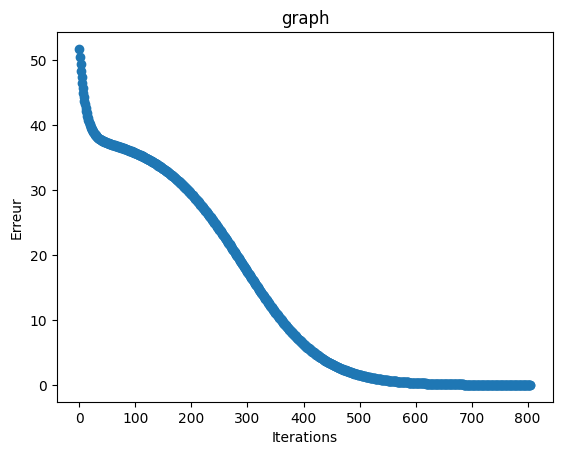

Angles finaux et iterations:


(array([ 2.51744106e-08, -2.87225237e+01,  1.11126675e+02]), 805)

In [36]:
#calcul q optimal pour un pas fixe
pas = 0.5
q_valeur=[]
e_valeur=[]



def q_suivant(q_actuel, pas_param=0.5,x_desire=(0,0,0),iterations=0) :
    
    #x-mgd= erreur
    erreur= x_desire-mgd(q_actuel)
    norme_erreur = np.linalg.norm(x_desire-mgd(q_actuel))
    critere_erreur=0.5*norme_erreur**2

    e_valeur.append(critere_erreur)


    if (critere_erreur < 0.01):
              plt.plot(range(iterations+1),e_valeur,marker ='o')
              plt.title("graph")
              plt.xlabel("Iterations")
              plt.ylabel("Erreur")
              plt.show()
              print ("Angles finaux et iterations:")
              return q_actuel,iterations
              #
              
    



    q_actuel=q_actuel + pas_param*np.dot(np.transpose(jacobienne(q_actuel)),erreur)
    return (q_suivant(q_actuel,pas_param,x_desire,iterations+1))


q_suivant((5,5,5),0.01,(10,0,5))
        







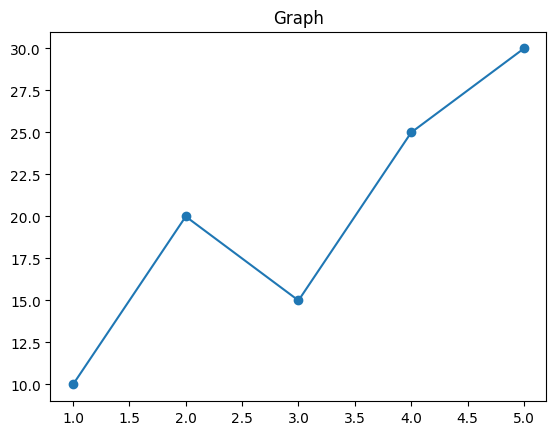

In [10]:
#################################################
# calcul du pas



# 2 - Méthode de Newton

On utilise le schéma de Newton pour calculer le MGI du robot en cherchant le zéro de la fonction:

$H(q) = X_d - f(q)$ 

pour une situation désirée $X_d = (x, y,\theta)^t$ avec $f(q)$ qui correspond au MGD en $q$.
Ce schéma impose de calculer l'inverse de la jacobienne analytique.

- Montrer hors séance que $directionN = J(q)^{-1} . (X_d - f(q))$ (à ne pas mettre dans votre fichier de réponse)

- Implémenter la méthode de Newton en python pour résoudre le MGI. Tester pour différentes conditions initiales(proches/loin de la solution, proches/loin de singularités. Modifier la valeur du $pas$. Faire varier  $N_{max}$ et $\epsilon$.

- Tracer la variation de l'erreur. Conclusions

### Utiliser votre code de la partie 1

# 3 - Conclusion

Donner vos conclusion sur l'utilisation de techniques de PNL pour le calcul de solutions de MGI

## Programme de test du MGI

Commenter vos résultats pour les 3 cas suivants puis pour deux cas que vous jugez différents
- Xbut = [12, 12,10] pour qinit= [-120.,  -25.,  -45.] et qinit= [120.,  25.,  45.]

- Xbut= [12, 10,12] et qinit = [90, 0, 0] 

- Xbut= [9.95, 5.5, 12.5] et qinit de votre choix



In [ ]:
########### Choix de Xbut #################  
#
qinit = ???
Xbut = ???
########### Choix de Nbiterations #################  
Nbiterations = ??
########### Choix de epsilon #################  
epsilon= ???
########### Calcul du MGI ################# 
qopt= mgi(Xd,qinit,Nbiterations, epsilon)
# Vérification du MGI
print("Xfinal avec qfinal = ",mgd(qopt)

# 4 - Utilisation de scipy.optimize

Parmi les fonctions de scipy.optimize, choisir la fonction qui vous semble la meilleure (expliquer pouquoi) permettant de calculer la solutions du MGI et comparer son résultat avec votre fonction mgi.